In [1]:
import sys
sys.path.append('..')
from economic_brazil.coleta_dados.economic_data_brazil import data_economic
from economic_brazil.processando_dados.divisao_treino_teste import treino_teste_seies_temporal
from codigos_rodando.tratando_dados import TratandoDados
from economic_brazil.treinamento.modelos_treinamento import TreinamentoModelos
from economic_brazil.treinamento.redes_neurais_recorrentes import RnnModel, HyperTurnerModel
from economic_brazil.treinamento.arima_treinamento import Arima, Sarimax
from economic_brazil.treinamento.treinamento_modelos_tuning import TimeSeriesModelTuner
import matplotlib.pyplot as plt

2024-05-20 12:04:39.756722: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-20 12:04:39.868920: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-20 12:04:44.142029: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-20 12:04:58.673243: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-20 12:05:38.207851: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [2]:
dados = data_economic()
tratando = TratandoDados(dados)
x_treino, x_teste, y_treino, y_teste = tratando.tratando_dados()
temporal_treino = treino_teste_seies_temporal(x_treino, y_treino, numero_divisoes=10, gap_series=0, max_train_size=100, test_size=10)
#temporal_teste = treino_teste_seies_temporal(x_teste, y_teste)


Erro ao buscar dados Expected object or value
Problema na importação dos dados do Banco Central.Arquivo selecionado da memoria com a ultima data sendo 2024-05-01 00:00:00.
O tamanho do treino e  (243, 17)
O tamanho do teste e  (50, 17)


from typing import Any


class TreinandoModelos:
    def __init__(self, x_treino, y_treino, x_teste, y_teste):
        self.x_treino = x_treino
        self.y_treino = y_treino
        self.x_teste = x_teste
        self.y_teste = y_teste
        self.modelos = TreinamentoModelos(self.x_treino, self.y_treino)
        self.tuning = TimeSeriesModelTuner(self.modelos, self.x_treino, self.y_treino)
        self.neural_network = RnnModel()
        
    def treinar_modelos(self,gradiente_boosting=True, xg_boost=True, cat_boost=True, regressao_linear=True,tuning_grid_search=False, tuning_random_search=False, tuning_bayes_search=True, 
                        param_grid_gradiente=None,param_grid_xgboost=None, param_grid_catboost=None, param_grid_regressao_linear=None):
        if gradiente_boosting:
            gradiente_boosting = self.modelos.modelo_gradient_boosting()
            if param_grid_gradiente is None:
                param_grid_gradiente = {
                    "n_estimators": [100, 200, 300, 400, 500],
                    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
                    "max_depth": [1, 3, 5, 7, 9],   
                }
            if tuning_grid_search:
                gradiente_boosting_best_params, _ = self.tuning.grid_search(param_grid_gradiente)
            if tuning_random_search:
                gradiente_boosting_best_params, _ = self.tuning.random_search(param_grid_gradiente)
            if tuning_bayes_search:
                gradiente_boosting_best_params, _ = self.tuning.bayesian_optimization(param_grid_gradiente)
            modelo_gradiente = self.modelos.treinar_gradient_boosting(**gradiente_boosting_best_params)
        if xg_boost:
            xg_boost = self.modelos.modelo_xgboost()
            if param_grid_xgboost is None:
                param_grid_xgboost = {
                    "n_estimators": [100, 200, 300, 400, 500],
                    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
                    "max_depth": [1, 3, 5, 7, 9],   
                }
            if tuning_grid_search:
                xg_boost_best_params, _ = self.tuning.grid_search(param_grid_xgboost)
            if tuning_random_search:
                xg_boost_best_params, _ = self.tuning.random_search(param_grid_xgboost)
            if tuning_bayes_search:
                xg_boost_best_params, _ = self.tuning.bayesian_optimization(param_grid_xgboost)     
            modelo_xgboost = self.modelos.treinar_xgboost(**xg_boost_best_params)
        if cat_boost:
            cat_boost = self.modelos.modelo_catboost()
            if param_grid_catboost is None:
                param_grid_catboost = {
                    "n_estimators": [100, 200, 300, 400, 500],
                    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
                    "max_depth": [1, 3, 5, 7, 9],   
                }
            if tuning_grid_search:
                cat_boost = self.tuning.grid_search(param_grid_catboost)
            if tuning_random_search:
                cat_boost_best_params, _ = self.tuning.random_search(param_grid_catboost)
            if tuning_bayes_search:
                cat_boost_best_params, _ = self.tuning.bayesian_optimization(param_grid_catboost)
            modelo_catboost = self.modelos.treinar_catboost(**cat_boost_best_params)
        if regressao_linear:
            regressao_linear = self.modelos.modelo_regressao_linear()
            if param_grid_regressao_linear is None:
                param_grid_regressao_linear = {
                    "fit_intercept": [True, False],
                    "normalize": [True, False],
                    "copy_X": [True, False],
                }
            if tuning_grid_search:
                regressao_linear = self.tuning.grid_search(param_grid_regressao_linear)
            if tuning_random_search:
                regressao_linear = self.tuning.random_search(param_grid_regressao_linear)
            if tuning_bayes_search:
                regressao_linear = self.tuning.bayesian_optimization(param_grid_regressao_linear)
            modelo_regressao_linear = self.modelos.treinar_regressao_linear(**regressao_linear)
            
        return modelo_gradiente, modelo_xgboost, modelo_catboost, modelo_regressao_linear
    
    def redes_neurais(self, x_treino, y_treino, x_teste, y_teste):
        x_train_neural, y_train_neural= self.neural_network.create_dataset(self.x_treino, self.x_treino, y_treino)
        x_teste_neural, y_teste_neural= self.neural_network.create_dataset(self.x_teste, self.y_teste)
        
        model_neural = neural_network.create_rnn_model(input_shape=(x_train_neural.shape[1], x_train_neural.shape[2]))
        model_neural = neural_network.treinar_modelo(model_neural, x_train_neural, y_train_neural, test_data=True, X_test=x_teste_neural,y_test=y_teste_neural)
        
        
    
        
    
    

    
    

In [12]:
from typing import Any, Dict, Optional


class TreinandoModelos:
    def __init__(self, x_treino, y_treino, x_teste, y_teste,tuning_grid_search=False, tuning_random_search=False, tuning_bayes_search=True):
        self.x_treino = x_treino
        self.y_treino = y_treino
        self.x_teste = x_teste
        self.y_teste = y_teste
        self.modelos = TreinamentoModelos(self.x_treino, self.y_treino)
        self.neural_network = RnnModel()
        self.tuning_grid_search = tuning_grid_search
        self.tuning_random_search = tuning_random_search
        self.tuning_bayes_search = tuning_bayes_search

    def treinar_modelos(
        self,
        gradiente_boosting=True,
        xg_boost=True,
        cat_boost=True,
        regressao_linear=True,
        param_grid_gradiente=None,
        param_grid_xgboost=None,
        param_grid_catboost=None,
        param_grid_regressao_linear=None
    ) -> Dict[str, Any]:
        """
        Treina vários modelos de machine learning com a possibilidade de tunagem de hiperparâmetros.

        :return: Dicionário com os modelos treinados.
        """
        resultados = {}

        if gradiente_boosting:
            modelo_gradiente = self._treinar_com_tunagem(
                self.modelos.modelo_gradient_boosting,
                self.modelos.treinar_gradient_boosting,
                param_grid_gradiente,
                
            )
            resultados["gradiente_boosting"] = modelo_gradiente

        if xg_boost:
            modelo_xgboost = self._treinar_com_tunagem(
                self.modelos.modelo_xgboost,
                self.modelos.treinar_xgboost,
                param_grid_xgboost,
                
            )
            resultados["xg_boost"] = modelo_xgboost

        if cat_boost:
            modelo_catboost = self._treinar_com_tunagem(
                self.modelos.modelo_catboost,
                self.modelos.treinar_catboost,
                param_grid_catboost,
            )
            resultados["cat_boost"] = modelo_catboost

        if regressao_linear:
            modelo_regressao_linear = self._treinar_com_tunagem(
                self.modelos.modelo_regressao_linear,
                self.modelos.treinar_regressao_linear,
                param_grid_regressao_linear,
            )
            resultados["regressao_linear"] = modelo_regressao_linear

        return resultados

    def _treinar_com_tunagem(
        self,
        modelo_func,
        treinar_func,
        param_grid,
    ) -> Any:
        """
        Função auxiliar para treinar o modelo com tunagem de hiperparâmetros.

        :return: Modelo treinado.
        """
        tuning =  TimeSeriesModelTuner(modelo_func, self.x_treino, self.y_treino)

        if self.tuning_grid_search:
            best_params, _ = tuning.grid_search(param_grid)
        elif self.tuning_random_search:
            best_params, _ = tuning.random_search(param_grid)
        elif self.tuning_bayes_search:
            best_params, _ = tuning.bayesian_optimization(param_grid)
        else:
            best_params = {}

        return treinar_func(**best_params)

    def redes_neurais(self):
        """
        Treina uma rede neural recorrente (RNN) com os dados fornecidos.

        :return: Modelo RNN treinado.
        """
        x_train_neural, y_train_neural = self.neural_network.create_dataset(self.x_treino, self.y_treino)
        x_teste_neural, y_teste_neural = self.neural_network.create_dataset(self.x_teste, self.y_teste)

        model_neural = self.neural_network.create_rnn_model(input_shape=(x_train_neural.shape[1], x_train_neural.shape[2]))
        model_neural = self.neural_network.treinar_modelo(
            model_neural,
            x_train_neural,
            y_train_neural,
            test_data=True,
            X_test=x_teste_neural,
            y_test=y_teste_neural
        )

        return model_neural


In [6]:
tuning = TreinandoModelos(x_treino, y_treino, x_teste, y_teste)
param_grid_gradiente = {
    "n_estimators": [100, 200, 300, 400, 500],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth": [1, 3, 5, 7, 9],   
}

param_grid_xgboost = {
    "n_estimators": [100, 200, 300, 400, 500],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth": [1, 3, 5, 7, 9],   
}

param_grid_catboost = {
    "iterations": [1, 2, 10,50, 100],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "depth": [1, 3, 5, 7, 9],
}
param_grid_regressao_linear = {
    "fit_intercept": [True, False],
    "normalize": [True, False],
}

modelos_tunning = tuning.treinar_modelos(param_grid_gradiente=param_grid_gradiente, param_grid_xgboost=param_grid_xgboost, param_grid_catboost=param_grid_catboost, param_grid_regressao_linear=param_grid_regressao_linear)

InvalidParameterError: The 'estimator' parameter of BayesSearchCV must be an object implementing 'fit'. Got <bound method TreinamentoModelos.modelo_gradient_boosting of <economic_brazil.treinamento.modelos_treinamento.TreinamentoModelos object at 0x7f01a6d07100>> instead.

In [7]:
modelos = TreinamentoModelos(x_treino, y_treino)
gradiente_boosting = modelos.modelo_gradient_boosting()
xg_boost = modelos.modelo_xgboost()
cat_boost = modelos.modelo_catboost()
regressao_linear = modelos.modelo_regressao_linear()

Best Grid Search Params: {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 500} Score: -0.3136027803481841
Best Random Search Params: {'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1} Score: -0.31886331727942724
Best Bayesian Optimization Params: OrderedDict([('learning_rate', 0.01), ('max_depth', 9), ('n_estimators', 500)]) Score: -2.5927628796001754


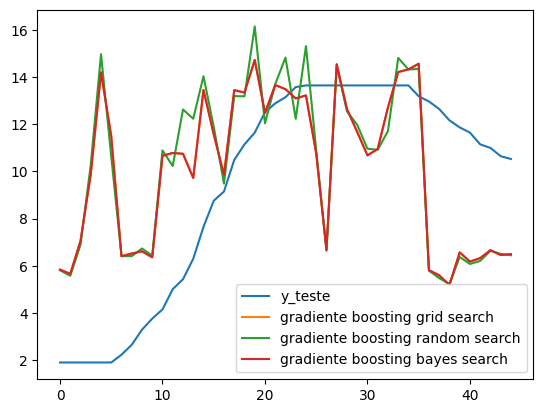

In [8]:
## parameters grid for tuning the model gradient boosting
tuning_gardiente = TimeSeriesModelTuner(gradiente_boosting, x_treino, y_treino)
param_grid_gradiente = {
    "n_estimators": [100, 200, 300, 400, 500],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth": [1, 3, 5, 7, 9],   
}
grid_search_best_params, grid_search_best_score = tuning_gardiente.grid_search(param_grid_gradiente)
random_search_best_params, random_search_best_score = tuning_gardiente.random_search(param_grid_gradiente) #grid_search_best_score
bayes_search_best_params, bayes_search_best_score = tuning_gardiente.bayesian_optimization(param_grid_gradiente) 
gra_search = modelos.treinar_gradient_boosting(**grid_search_best_params)
gra_random = modelos.treinar_gradient_boosting(**random_search_best_params)
gra_bayes = modelos.treinar_gradient_boosting(**bayes_search_best_params)#
plt.plot(y_teste, label="y_teste")
plt.plot(gra_search.predict(x_teste), label="gradiente boosting grid search")
plt.plot(gra_random.predict(x_teste), label="gradiente boosting random search")
plt.plot(gra_bayes.predict(x_teste), label="gradiente boosting bayes search")
plt.legend()

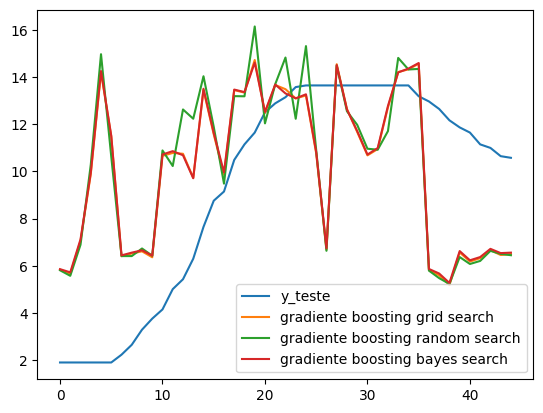

In [16]:
plt.plot(y_teste, label="y_teste")
plt.plot(gra_search.predict(x_teste), label="gradiente boosting grid search")
plt.plot(gra_random.predict(x_teste), label="gradiente boosting random search")
plt.plot(gra_bayes.predict(x_teste), label="gradiente boosting bayes search")
plt.legend()

In [20]:
## parameters grid for tuning the model xgboost
tuning_xg = TimeSeriesModelTuner(xg_boost, x_treino, y_treino)
param_grid_xgboost = {
    "n_estimators": [100, 200, 300, 400, 500],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth": [1, 3, 5, 7, 9],   
}
grid_search_best_params_xg, grid_search_best_score_xg = tuning_xg.grid_search(param_grid_xgboost)
random_search_best_params_xg, random_search_best_score_xg = tuning_xg.random_search(param_grid_xgboost) #grid_search_best_score
bayes_search_best_params_xg, bayes_search_best_score_xg = tuning_xg.bayesian_optimization(param_grid_xgboost)

Best Grid Search Params: {'learning_rate': 0.15, 'max_depth': 9, 'n_estimators': 200} Score: -0.3148194873616518
Best Random Search Params: {'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.025} Score: -0.31860863771251346
Best Bayesian Optimization Params: OrderedDict([('learning_rate', 0.15), ('max_depth', 9), ('n_estimators', 500)]) Score: -2.5929231475830075


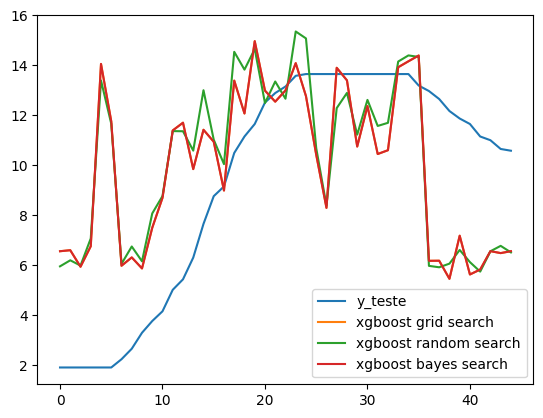

In [21]:
xg_boost = modelos.treinar_xgboost(**grid_search_best_params_xg)
xg_random = modelos.treinar_xgboost(**random_search_best_params_xg)
xg_bayes = modelos.treinar_xgboost(**bayes_search_best_params_xg)
plt.plot(y_teste, label="y_teste")
plt.plot(xg_boost.predict(x_teste), label="xgboost grid search")
plt.plot(xg_random.predict(x_teste), label="xgboost random search")
plt.plot(xg_bayes.predict(x_teste), label="xgboost bayes search")
plt.legend()

In [22]:
## parameters grid for tuning the model catboost
tuning_cat = TimeSeriesModelTuner(cat_boost, x_treino, y_treino)
param_grid_catboost = {
    "iterations": [1, 2, 10,50, 100],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "depth": [1, 3, 5, 7, 9],
}
grid_search_best_params_cat, grid_search_best_score_cat = tuning_cat.grid_search(param_grid_catboost)
random_search_best_params_cat, random_search_best_score_cat = tuning_cat.random_search(param_grid_catboost) #grid_search_best_score
bayes_search_best_params_cat, bayes_search_best_score_cat = tuning_cat.bayesian_optimization(param_grid_catboost) #

0:	learn: 3.4722140	total: 126ms	remaining: 0us
0:	learn: 3.3124337	total: 270us	remaining: 0us
0:	learn: 3.3369525	total: 238us	remaining: 0us
0:	learn: 2.2935465	total: 190us	remaining: 0us
0:	learn: 1.7723685	total: 252us	remaining: 0us
0:	learn: 1.9592617	total: 257us	remaining: 0us
0:	learn: 2.2106355	total: 277us	remaining: 0us
0:	learn: 2.1757109	total: 276us	remaining: 0us
0:	learn: 2.4242142	total: 638us	remaining: 0us
0:	learn: 2.7187148	total: 594us	remaining: 0us
0:	learn: 3.4637944	total: 380us	remaining: 0us
0:	learn: 3.3054859	total: 277us	remaining: 0us
0:	learn: 3.3357167	total: 409us	remaining: 0us
0:	learn: 2.2925079	total: 193us	remaining: 0us
0:	learn: 1.7715154	total: 202us	remaining: 0us
0:	learn: 1.9551750	total: 193us	remaining: 0us
0:	learn: 2.2077070	total: 258us	remaining: 0us
0:	learn: 2.1722018	total: 197us	remaining: 0us
0:	learn: 2.4203327	total: 420us	remaining: 0us
0:	learn: 2.7059546	total: 213us	remaining: 0us
0:	learn: 3.4499860	total: 390us	remaini

0:	learn: 4.6152578	total: 1.34ms	remaining: 132ms
1:	learn: 4.4509381	total: 1.92ms	remaining: 94.2ms
2:	learn: 4.3313244	total: 2.47ms	remaining: 79.9ms
3:	learn: 4.2233340	total: 2.97ms	remaining: 71.2ms
4:	learn: 4.1214866	total: 3.46ms	remaining: 65.8ms
5:	learn: 4.0153235	total: 3.99ms	remaining: 62.5ms
6:	learn: 3.9210199	total: 4.63ms	remaining: 61.5ms
7:	learn: 3.8322640	total: 5.25ms	remaining: 60.4ms
8:	learn: 3.7745763	total: 5.76ms	remaining: 58.2ms
9:	learn: 3.7018345	total: 6.19ms	remaining: 55.7ms
10:	learn: 3.6502979	total: 6.6ms	remaining: 53.4ms
11:	learn: 3.5944747	total: 7.04ms	remaining: 51.6ms
12:	learn: 3.5420644	total: 7.55ms	remaining: 50.6ms
13:	learn: 3.4934951	total: 8.26ms	remaining: 50.7ms
14:	learn: 3.4563667	total: 8.7ms	remaining: 49.3ms
15:	learn: 3.4184776	total: 9.24ms	remaining: 48.5ms
16:	learn: 3.3878066	total: 9.79ms	remaining: 47.8ms
17:	learn: 3.3438991	total: 10.3ms	remaining: 46.8ms
18:	learn: 3.2972391	total: 11ms	remaining: 46.9ms
19:	lear

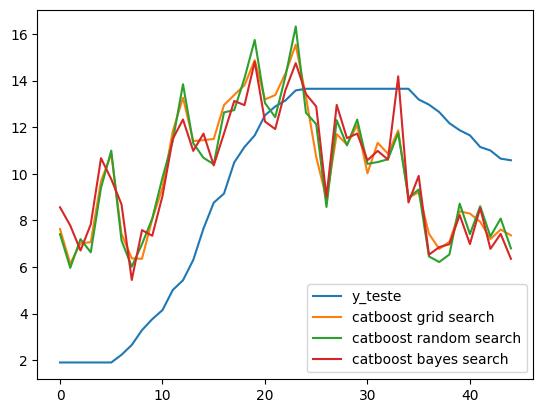

In [23]:
cat_search = modelos.treinar_catboost(**grid_search_best_params_cat)
cat_random = modelos.treinar_catboost(**random_search_best_params_cat)
cat_bayes = modelos.treinar_catboost(**bayes_search_best_params_cat)
plt.plot(y_teste, label="y_teste")
plt.plot(cat_search.predict(x_teste), label="catboost grid search")
plt.plot(cat_random.predict(x_teste), label="catboost random search")
plt.plot(cat_bayes.predict(x_teste), label="catboost bayes search")
plt.legend()

In [64]:
regressao = modelos.treinar_regressao_linear()
  

In [4]:
neural_network = RnnModel()
x_train_neural, y_train_neural= neural_network.create_dataset(x_treino, y_treino)
x_teste_neural, y_teste_neural= neural_network.create_dataset(x_teste, y_teste)

In [5]:
model_neural = neural_network.create_rnn_model(input_shape=(x_train_neural.shape[1], x_train_neural.shape[2]))
model_neural = neural_network.treinar_modelo(model_neural, x_train_neural, y_train_neural, test_data=True, X_test=x_teste_neural,y_test=y_teste_neural)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.0000e+00 - loss: 186.5422 - val_accuracy: 0.0000e+00 - val_loss: 108.7548
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 185.0467 - val_accuracy: 0.0000e+00 - val_loss: 106.8129
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 189.5572 - val_accuracy: 0.0000e+00 - val_loss: 104.3426
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: 173.0624 - val_accuracy: 0.0000e+00 - val_loss: 100.9544
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 173.3414 - val_accuracy: 0.0000e+00 - val_loss: 95.9083
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 171.1965 - val_accuracy: 0.0000e+00 - val_loss: 88.2468
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 160.0269 - val_accuracy: 0.0000e+00 - val_loss: 76.9832
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━

In [6]:
index_treino = dados.index[dados.index <='2020-04-01'][6:]
index_teste = dados.index[dados.index >'2020-04-01']

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


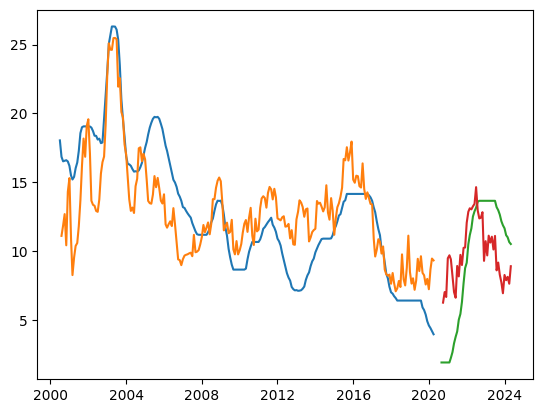

In [7]:
plt.plot(index_treino,y_treino)
plt.plot(index_treino[1:],neural_network.predizer_modelo(model_neural, x_train_neural).squeeze())
plt.plot(index_teste[4:],y_teste)
plt.plot(index_teste[5:],neural_network.predizer_modelo(model_neural, x_teste_neural).squeeze())


In [21]:
tunning_neural = HyperTurnerModel(x_train_neural, y_train_neural, x_teste_neural, y_teste_neural)

model_neural = tunning_neural.tuner(epochs=10)

Trial 5 Complete [00h 00m 37s]
val_loss: 110.90823364257812

Best val_loss So Far: 22.28370984395345
Total elapsed time: 00h 03m 03s


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 56)          │        14,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 56)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 56)          │        25,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 56)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 56)          │        25,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1, 1)           │            57 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,793 (253.10 KB)

 Trainable params: 64,793 (253.10 KB)

 Non-trainable params: 0 (0.00 B)

None


In [34]:
index_treino = dados.index[dados.index <='2020-04-01'][6:]
index_teste = dados.index[dados.index >'2020-04-01']

In [39]:
y_treino.shape, model_neural.predict(x_train_neural).squeeze().shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


((238,), (237,))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


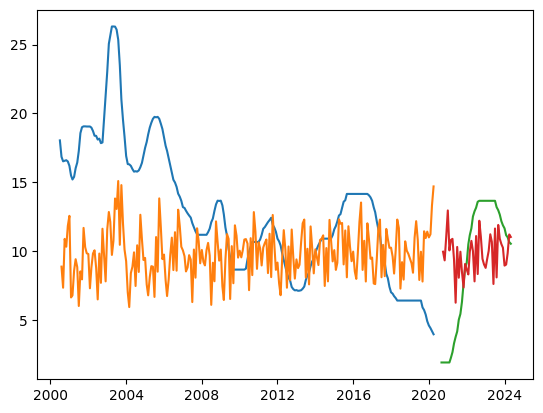

In [46]:
plt.plot(index_treino,y_treino)
plt.plot(index_treino[1:],model_neural.predict(x_train_neural).squeeze())
plt.plot(index_teste[4:],y_teste)
plt.plot(index_teste[5:],model_neural.predict(x_teste_neural).squeeze())

In [7]:
sari = Sarimax()

rank_arima, valor_p, valor_q = sari.encontrar_parametros_sarimax(x_treino, y_treino, divisao=120)

KeyboardInterrupt: 

In [6]:
rank_arima, valor_p, valor_q

NameError: name 'rank_arima' is not defined

In [87]:
from numpy.linalg import LinAlgError
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np
def encontrar_parametros_sarimax(x, y, divisao=120):
        train_size = divisao
        results = {}
        y_true = y[train_size:]
        for p in range(5):
            for q in range(5):
                aic, bic = [], []
                if p == 0 and q == 0:
                    continue
                convergence_error = stationarity_error = 0
                y_pred = []
                for T in range(train_size, len(x)):
                    #train_set = dados.iloc[T - train_size : T]
                    train_set = x[T - train_size : T]
                    y_true_set = y[T - train_size : T]
                            
                    """try:
                                model = SARIMAX(endog=train_set, order=(p, 0, q)).fit()
                            except LinAlgError:
                                convergence_error += 1
                            except ValueError:
                                stationarity_error += 1"""
                            
                    model = SARIMAX(endog=y_true_set,exog=train_set, order=(p, 0, q)).fit(disp=False)

                    # forecast, _, _ = model.forecast(steps=1)
                    forecast = model.predict(start=0,end=y_true.shape[0],exog=train_set)
                    y_pred.append(forecast[0])
                    aic.append(model.aic)   
                    bic.append(model.bic)

                result = (
                            pd.DataFrame({"y_true": y_true, "y_pred": y_pred})
                            .replace(np.inf, np.nan)
                            .dropna()
                        )

                rmse = np.sqrt(
                            mean_squared_error(y_true=result.y_true, y_pred=result.y_pred)
                        )

                results[(p, q)] = [
                            rmse,
                            np.mean(aic),
                            np.mean(bic),
                            convergence_error,
                            stationarity_error,
                        ]
                arma_results = pd.DataFrame(results).T
                arma_results.columns = [
                            "RMSE",
                            "AIC",
                            "BIC",
                            "convergence",
                            "stationarity",
                        ]
                arma_results.index.names = ["p", "q"]
                rank_arima = (
                            arma_results.rank().loc[:, ["RMSE", "BIC"]].mean(1).nsmallest(5)
                        )
                valor_p = rank_arima.index[0][0]
                valor_q = rank_arima.index[0][1]
                
            print(p)


        return rank_arima, valor_p, valor_q

In [88]:
rank_arima, valor_p, valor_q = encontrar_parametros_sarimax(x_treino, y_treino, divisao=120)

0
1
2
3
4
